In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,MaxPooling2D

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [80]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-2mldsz_4
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-2mldsz_4
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.0-cp36-none-any.whl size=42169 sha256=ee533b12ac8ec1c08432af731745f86432c54e4bea273b86caf3c5f7f806b38c
  Stored in directory: /tmp/pip-ephem-wheel-cache-y7yy9xvi/wheels/03/a0/39/171f6040d36f36c71168dc69afa81334351b20955dc36ce932
Successfully built Keras-Preprocessing


In [0]:
train_folder= '/content/gdrive/My Drive/subset'

In [0]:
os.listdir(train_folder)
train_n = train_folder+'/Normal subset/'
train_p = train_folder+'/pneum subset/'

In [83]:
print(train_n)

/content/gdrive/My Drive/subset/Normal subset/


NORMAL


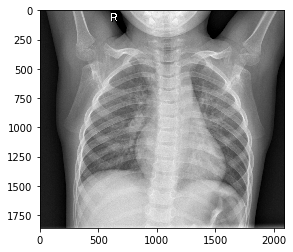

In [84]:
img_name='IM-0115-0001.jpeg'
img_normal=load_img(train_n+img_name)
print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA AFFECTED


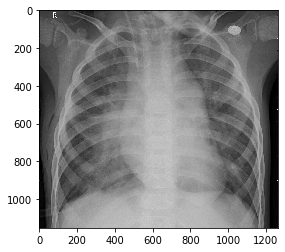

In [85]:
img_name='person12_bacteria_47.jpeg'
img_pneum=load_img(train_p+img_name)
print('PNEUMONIA AFFECTED')
plt.imshow(img_pneum)
plt.show()

In [86]:
normal_cases=glob(train_n+'/*jpeg')
len(normal_cases)

105

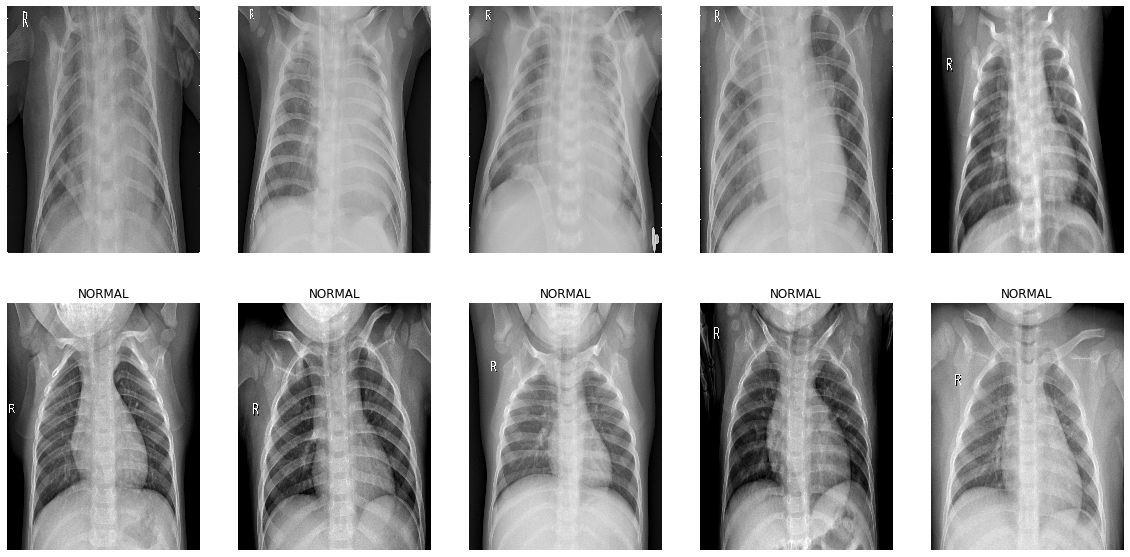

In [87]:
normal=glob(train_n+'/*.jpeg')
pneumonia=glob(train_p+'/*.jpeg')

train_data=[]

for image in normal:
  train_data.append((image,0))

for image in pneumonia:
  train_data.append((image,1))

train_data=pd.DataFrame(train_data,columns=['image','label'],index=None)

train_data=train_data.sample(frac=1.).reset_index(drop=True)

normal_samples=(train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
pneumonia_samples=(train_data[train_data['label']==1]['image'].iloc[:5]).tolist()

samples=pneumonia_samples+normal_samples

#plot
f,ax=plt.subplots(2,5,figsize=(20,10))
for i in range(10):
  img=imread(samples[i])
  ax[i//5, i%5].imshow(img, cmap='gray')
  if i<5:
    ax[i//5, i%5]
  else:
    ax[i//5, i%5].set_title("NORMAL")
  ax[i//5, i%5].axis('off')
  ax[i//5, i%5].set_aspect('auto')
plt.show()



In [88]:
train_data.head()

,image,label
0,/content/gdrive/My Drive/subset/Normal subset/...,0
1,/content/gdrive/My Drive/subset/Normal subset/...,0
2,/content/gdrive/My Drive/subset/pneum subset/p...,1
3,/content/gdrive/My Drive/subset/Normal subset/...,0
4,/content/gdrive/My Drive/subset/Normal subset/...,0


In [89]:
train_data.shape[0]


209

In [90]:
#CHECK SIZE

from PIL import Image

im = Image.open('/content/gdrive/My Drive/subset/pneum subset/person12_bacteria_47.jpeg')
width, height = im.size
print(width,height)

1264 1152


In [91]:
train_data.tail()

,image,label
204,/content/gdrive/My Drive/subset/pneum subset/p...,1
205,/content/gdrive/My Drive/subset/Normal subset/...,0
206,/content/gdrive/My Drive/subset/pneum subset/p...,1
207,/content/gdrive/My Drive/subset/pneum subset/p...,1
208,/content/gdrive/My Drive/subset/pneum subset/p...,1


In [0]:
img_wid,img_height=150,150

In [0]:
train_data_dir="/content/gdrive/My Drive/subset"
test_data_dir="/content/gdrive/My Drive/test (1)"

train_samples=208
epochs=20
batch_size=16

In [94]:
!pip install keras

In [0]:
from keras import backend as k
if k.image_data_format()=='channels_first':
  image_shape=(3,img_wid,img_height)
else:
  input_shape=(img_wid,img_height,3)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)       

In [98]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory('/content/gdrive/My Drive/subset',target_size=(150,150),batch_size=32,class_mode='binary')
test_gen=test_datagen.flow_from_directory('/content/gdrive/My Drive/test (1)',target_size=(150,150),batch_size=32,class_mode='binary')

model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit_generator(train_gen,epochs=10)



Found 209 images belonging to 2 classes.
Found 109 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.6991 - acc: 0.5215
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6544 - acc: 0.6172
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.5251 - acc: 0.8230
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.3726 - acc: 0.8517
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.2418 - acc: 0.9234
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.2510 - acc: 0.9187
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.1735 - acc: 0.9330
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 0.1857 - acc: 0.9330
Epoch 9/10
7/7 [==============================] - 9s 1s/step - loss: 0.1395 - acc: 0.9617
Epoch 10/10
7/7 [==============================] - 8s 1s/step - loss: 0.1048 - acc: 0.9665
